In [10]:
import tensorflow as tf

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
    print(e)

2022-02-11 17:09:41.010721: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-11 17:09:41.011745: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-02-11 17:09:41.057084: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-11 17:09:41.057624: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2022-02-11 17:09:41.057645: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-02-11 17:09:41.060270: I tensorflow/stream_executor/platform/default/dso_loade

In [3]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import os, shutil

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from tensorflow.keras.preprocessing.text import Tokenizer

# RNN
- 순환신경망
- 시계열 데이터에 적합

## IMDB에 RNN 사용하기
- 정수인덱싱 바로 받아오기

In [12]:
from tensorflow.keras.datasets import imdb

In [14]:
max_features = 10000
maxlen = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

17465344/17464789 [==============================] - 0s 0us/step


In [15]:
x_train[:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [18]:
x_train = tf.keras.preprocessing.sequence.pad_sequences( x_train, maxlen = maxlen )
x_test = tf.keras.preprocessing.sequence.pad_sequences( x_test, maxlen = maxlen )

## 네트워크 구성

In [17]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Embedding( max_features, 32 ))
model.add( tf.keras.layers.SimpleRNN(32) )
model.add( tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(
  loss='binary_crossentropy',
  metrics = ['acc'],
  optimizer = 'rmsprop'
)

2022-02-11 17:29:23.937698: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-11 17:29:23.937880: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-11 17:29:23.938055: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-11 17:29:23.938605: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2022-02-11 17:29:23.

In [19]:
hist = model.fit( x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

2022-02-11 17:32:39.179869: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-11 17:32:39.199719: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499995000 Hz


Epoch 1/10


2022-02-11 17:32:40.466351: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-02-11 17:32:41.487213: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


157/157 [==============================] - 67s 416ms/step - loss: 0.6814 - acc: 0.5534 - val_loss: 0.6451 - val_acc: 0.6560
Epoch 2/10
157/157 [==============================] - 65s 413ms/step - loss: 0.4219 - acc: 0.8139 - val_loss: 0.3791 - val_acc: 0.8404
Epoch 3/10
157/157 [==============================] - 87s 553ms/step - loss: 0.2817 - acc: 0.8899 - val_loss: 0.4574 - val_acc: 0.7842
Epoch 4/10
157/157 [==============================] - 93s 590ms/step - loss: 0.2231 - acc: 0.9184 - val_loss: 0.3852 - val_acc: 0.8336
Epoch 5/10
157/157 [==============================] - 91s 582ms/step - loss: 0.1588 - acc: 0.9426 - val_loss: 0.4287 - val_acc: 0.8444
Epoch 6/10
157/157 [==============================] - 91s 580ms/step - loss: 0.1029 - acc: 0.9665 - val_loss: 0.4429 - val_acc: 0.8346
Epoch 7/10
157/157 [==============================] - 93s 595ms/step - loss: 0.0684 - acc: 0.9797 - val_loss: 0.4691 - val_acc: 0.8440
Epoch 8/10
157/157 [==============================] - 92s 587ms/st

RNN은 CNN에 비해 속도가 느림

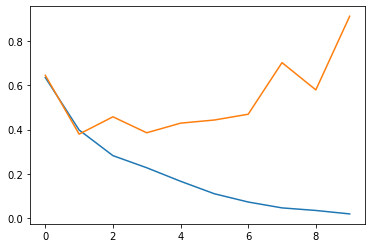

In [20]:
plt.plot( hist.history['loss'], label='train loss')
plt.plot( hist.history['val_loss'], label='validation loss')

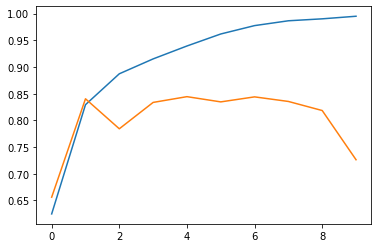

In [21]:
plt.plot( hist.history['acc'], label='train accuracy')
plt.plot( hist.history['val_acc'], label='validation accuracy')